In [29]:
%autosave 0

Autosave disabled


In [30]:
import os
startup_file = "/Users/octavia/Dropbox/fire/src_v1/startup.py"

In [31]:
run "/Users/octavia/Dropbox/fire/src_v1/startup.py"

In [32]:
params = default_params()

update = {
          "alpha" : 0.05,
          "RI" : 20,
          "severity" : 0.70,
          "severity_type" : "random",
          "ignition_type" : "random",          
         }

params.update(update)
p = RCSR(update)
p.run()



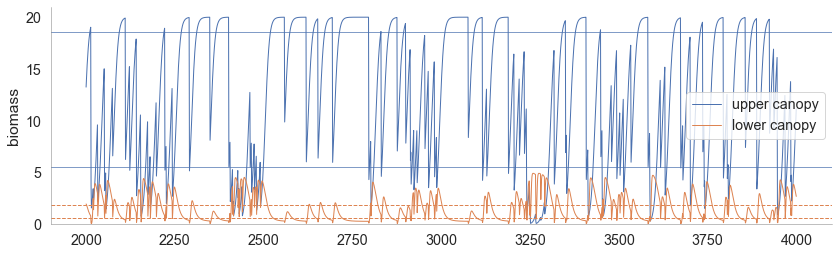

In [33]:
canopy_plot(p , nfire = 100)

In [34]:
# Simulation batch
sim_dir = project_dir + "/sims_random_check"
file_dir = sim_dir + "/all_sims"
if os.path.isdir(file_dir)  == False:
    os.mkdir(file_dir)
    
sys.path.append(sim_dir)
if "params" in sys.modules:
    del sys.modules["params"]
from params import all_params


In [35]:
all_sims = read_all_sims(file_dir)

In [36]:
res = compute_all_errors(all_sims, sim_dir, recomp = True)

In [37]:
res = pd.read_pickle(sim_dir + "/analytic_errs.pkl")

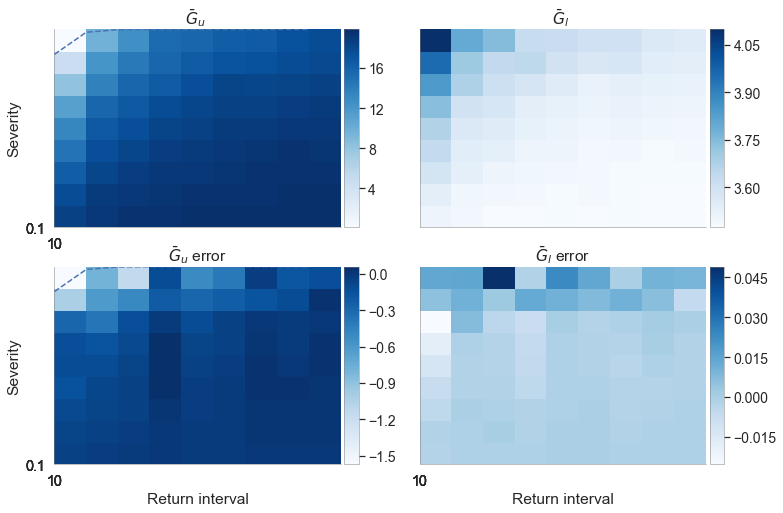

In [38]:
subset = res[(res.alpha==0.02)&(res.r_l == 1.5) & (res.beta == 0.2)]
x_var = "RI"
y_var = "severity"
subset = subset.sort_values(by = [x_var, y_var])
axes = plot_G_grid(subset, x_var, y_var)

RIs = np.unique(subset.RI)
p = RCSR(subset.iloc[0])
severities = p.max_severity(p.r_u*p.S**p.beta, RIs)
axes[0, 0].plot(RIs, severities, '--' )
axes[1, 0].plot(RIs, severities, '--' )


In [39]:
res.tau = res.r_u*res.S**res.beta

In [44]:
print_all_params(all_params)

batch vars:
  beta [0.2, 0.4, 0.6, 0.8]
  alpha [0.02, 0.04]
sim vars:
  RI [10 20 30 40 50 60 70 80 90]
  severity [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


## Where are the errors biggest?

In [45]:

x = res["G_l_mean_e"]
cols = ["r_l", "alpha", "severity", "RI", "G_l_mean_a", "G_l_mean_c", "G_l_mean_e" ]
high_error_case = res[x == np.max(x)]
high_error_case[cols]



,r_l,alpha,severity,RI,G_l_mean_a,G_l_mean_c,G_l_mean_e
"alpha-0.04,beta-0.8,RI-30,severity-0.9",1.5,0.04,0.9,30.0,2.190649,2.554336,0.363687


In [46]:
p = all_sims.loc[high_error_case.index[0]][0]

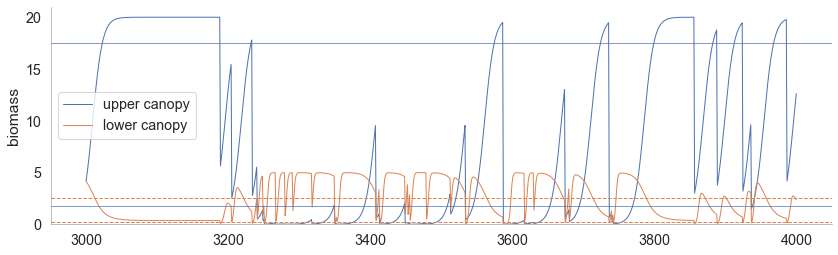

In [47]:
canopy_plot(p, 100)


In [48]:
compute_errors_mean(p)[0]

,analytic,computed,errors,errors_percent
G_u_mean,10.471059,8.688207,-1.782852,-20.520366
G_l_mean,2.190649,2.554336,0.363687,14.238036
RI,30.000000,28.542857,-1.457143,-5.105105
RI_std,30.000000,38.019610,8.019610,21.093352
severity,0.867389,0.858105,-0.009284,-1.081954
severity_std,0.077470,0.103069,0.025600,24.837389


### Diagnostic plots for high-error  cases

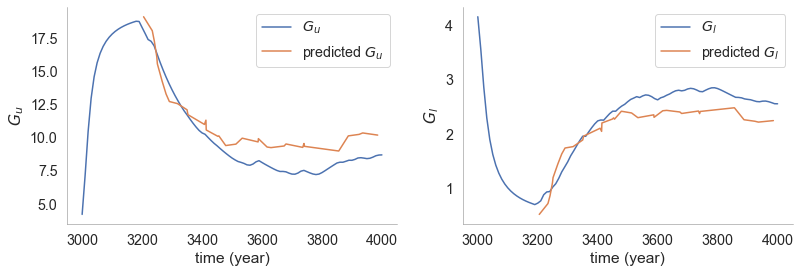

In [49]:
check_convergence(p, to = 0, slice = 100)


Text(0.5, 0, 'severity')

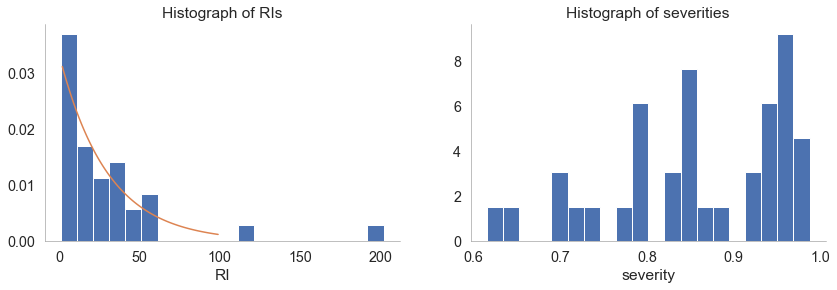

In [50]:
fig, axes = plt.subplots(1, 2, figsize = (14,4) )
axes[0].hist(p.record.time_past_fire, 20, normed=True);
y = np.arange(2, 100)
lambda_RI = 1/p.RI
axes[0].plot(y, lambda_RI*np.exp(-lambda_RI*y), label = "RI pdf")
axes[0].set_title("Histograph of RIs")
axes[0].set_xlabel("RI")

axes[1].hist(p.record.u_severity, 20, normed=True);
axes[1].set_title("Histograph of severities")
axes[1].set_xlabel("severity")